#How do genres and song attributes influence songs' popularity on Spotify?
##Zofia Broszczak, 446277, USL, DS&BA UW
Music streaming platforms like Spotify collect a huge amount of data about songs and listener behavior. Understanding what makes a song popular is important for artists, producers, and streaming platforms to connect better with their audiences. Popularity reflects how much a song is liked and listened to, and it can be influenced by many factors, including the song's features.

This study uses association rule mining to find patterns between song attributes and their impact on popularity.

The dataset utilized for this project was sourced from Kaggle ([Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download)). While Spotify previously provided its own datasets for researchers, access to these has since been discontinued. Although Spotify’s API still is a viable option for obtaining accurate data, I have opted not to use it, as doing so falls outside the scope of this project.

The chosen Kaggle dataset is comprehensive and includes essential features like danceability, energy, and popularity. Alomng the dataset, there are well-documented variable descriptions, making it accessible and easy to interpret. Additionally, it has been widely used by researchers, which further validates its reliability. These factors make it a great choice for my project.

#Packages

In [ ]:
install.packages("arules")
install.packages("ggplot2")

library(arules)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




#Data Preprocessing

In [ ]:
data <- read.csv("dataset.csv")

The first step is removing columns that are unnecessary for the analysis.

In [ ]:
colnames(data)

[1] "X"                "track_id"         "artists"          "album_name"      
 [5] "track_name"       "popularity"       "duration_ms"      "explicit"        
 [9] "danceability"     "energy"           "key"              "loudness"        
[13] "mode"             "speechiness"      "acousticness"     "instrumentalness"
[17] "liveness"         "valence"          "tempo"            "time_signature"  
[21] "track_genre"

In [ ]:
data$X <- NULL
data$track_id <- NULL
data$artists <- NULL
data$album_name <- NULL
data$track_name <- NULL
data

popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,1.01e-06,0.3580,0.7150,87.917,4,acoustic
55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,5.56e-06,0.1010,0.2670,77.489,4,acoustic
57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.00e+00,0.1170,0.1200,76.332,4,acoustic
71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,7.07e-05,0.1320,0.1430,181.740,3,acoustic
82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.00e+00,0.0829,0.1670,119.949,4,acoustic
58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.00e+00,0.1890,0.6660,98.017,4,acoustic
74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,2.89e-06,0.0913,0.0765,141.284,3,acoustic
80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.00e+00,0.0973,0.7120,150.960,4,acoustic
74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.00e+00,0.1510,0.6690,130.088,4,acoustic


The next step is discretizing continuous numeric variables.

In [ ]:
colnames(data)

[1] "popularity"       "duration_ms"      "explicit"         "danceability"    
 [5] "energy"           "key"              "loudness"         "mode"            
 [9] "speechiness"      "acousticness"     "instrumentalness" "liveness"        
[13] "valence"          "tempo"            "time_signature"   "track_genre"

In [ ]:
data$popularity <- cut(data$popularity, breaks = c(0, 30, 70, 100), labels = c("low", "medium", "high"))
data$duration_ms <- cut(data$duration_ms, breaks = c(0, 180000, 300000, 360000), labels = c("short", "medium length", "long"))
data$danceability <- cut(data$danceability, breaks = c(0, 0.3, 0.7, 1), labels = c("low", "medium", "high"))
data$energy <- cut(data$energy, breaks = c(0, 0.3, 0.7, 1), labels = c("low", "medium", "high"))
data$loudness <- cut(data$loudness, breaks = c(-50, -20, 0-5, 5), labels = c("quiet", "moderate", "loud"))
data$speechiness <- cut(data$speechiness, breaks = c(0, 0.33, 0.66, 1), labels = c("musical", "music and speach", "speech-like"))
data$acousticness <- cut(data$acousticness, breaks = c(0, 0.3, 0.7, 1), labels = c("low", "medium", "high"))
data$instrumentalness <- cut(data$instrumentalness, breaks = c(0, 0.1, 0.5, 1), labels = c("low", "medium", "high"))
data$liveness <- cut(data$liveness, breaks = c(0, 0.8, 1), labels = c("in studio", "live"))
data$valence <- cut(data$valence, breaks = c(0, 0.3, 0.7, 1), labels = c("sad", "neutral", "happy"))
data$tempo <- cut(data$tempo, breaks = c(0, 60, 120, 250), labels = c("slow", "moderate", "fast"))

I am also converting one binary variable into categorical values to make interpretation easier.

In [ ]:
data$mode <- ifelse(data$mode == 1, "Major", "Minor")

In [ ]:
data <- na.omit(data)

In [ ]:
data

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
,<fct>,<fct>,<chr>,<fct>,<fct>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<chr>
1,high,medium length,False,medium,medium,1,moderate,Minor,musical,low,low,in studio,happy,moderate,4,acoustic
2,medium,short,False,medium,low,1,moderate,Major,musical,high,low,in studio,sad,moderate,4,acoustic
4,high,medium length,False,low,low,0,moderate,Major,musical,high,low,in studio,sad,fast,3,acoustic
7,high,medium length,False,medium,low,2,moderate,Major,musical,high,low,in studio,sad,fast,3,acoustic
10,medium,medium length,False,medium,medium,1,moderate,Major,musical,medium,low,in studio,sad,moderate,4,acoustic
15,medium,medium length,False,high,high,2,moderate,Major,musical,low,low,in studio,neutral,fast,4,acoustic
16,medium,medium length,False,medium,medium,4,moderate,Major,musical,low,low,in studio,sad,moderate,3,acoustic
17,medium,short,False,high,low,2,moderate,Major,musical,high,low,in studio,neutral,moderate,4,acoustic
18,medium,short,False,high,low,10,moderate,Minor,musical,high,low,in studio,neutral,moderate,4,acoustic


Removing rows with missing values resultes in reducing the number of rows by almost double but the number of rows is still satisfactory for this project as it is almost 60 000.

#Association rules

In this research, I will treat `popularity` as the rule consequent. I will start by looking at the distribution of the variable.

In [ ]:
table(data$popularity)


   low medium   high 
 23222  33424   2776 

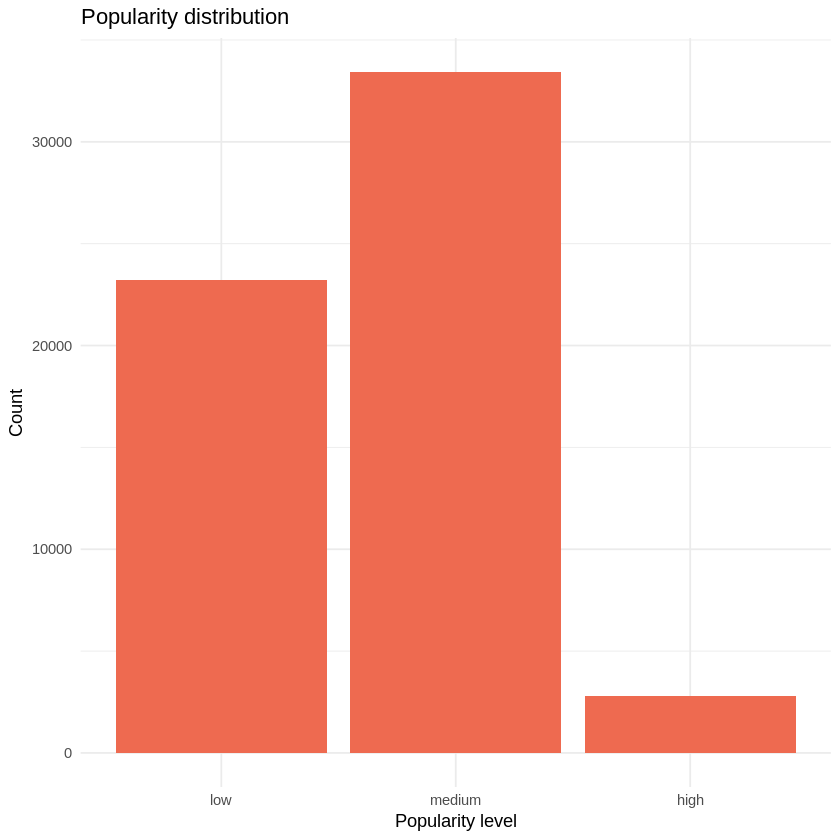

In [ ]:
ggplot(as.data.frame(table(data$popularity)), aes(Var1, Freq)) + geom_bar(stat = "identity", fill = "coral2") + labs(title = "Popularity distribution", x="Popularity level", y = "Count") + theme_minimal()

The `popularity` variable shows that most songs in the dataset fall into the `medium` popularity category, with 33424 songs. A slightly smaller number, 23222 songs, have `low` popularity, while the `high` popularity category has 2776 songs. This shows that highly popular songs are rare compared to medium and low popularity songs.

The next step is converting the dataset to a transactional format.

In [ ]:
data[] <- lapply(data, as.factor)
trans <- as(data, "transactions")

summary(trans)

transactions as itemMatrix in sparse format with
 59422 rows (elements/itemsets/transactions) and
 167 columns (items) and a density of 0.09580838 

most frequent items:
speechiness=musical  liveness=in studio      explicit=False    time_signature=4 
              58416               58034               55220               53191 
  loudness=moderate             (Other) 
              42841              683050 

element (itemset/transaction) length distribution:
sizes
   16 
59422 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     16      16      16      16      16      16 

includes extended item information - examples:
             labels  variables levels
1    popularity=low popularity    low
2 popularity=medium popularity medium
3   popularity=high popularity   high

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             4

The dataset was converted into a sparse matrix in transaction format, containing 59422 transactions and 167 items, with a density of 9.58%. Most frequent items include `speechiness=musical`, `liveness=in studio`, `explicit=False`, `time_signature=4`, and `loudness=moderate`. All transactions have the same length, with exactly 16 items per transaction.

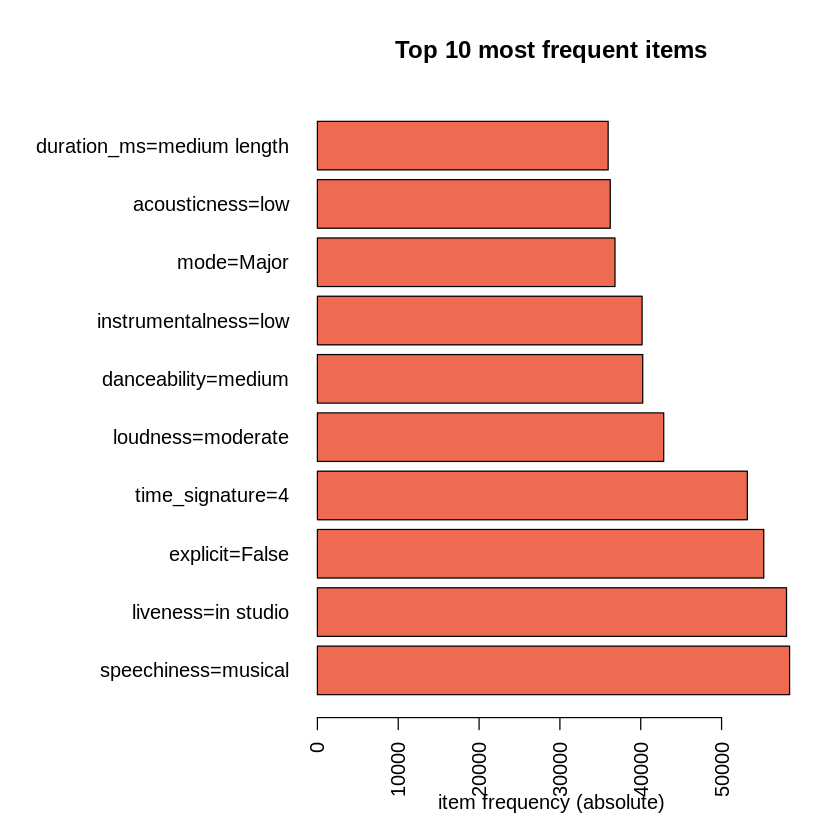

In [ ]:
itemFrequencyPlot(trans, topN = 10, type = "absolute", col = "coral2", main = "Top 10 most frequent items", horiz = TRUE)

The most frequent items are `musical` (not spoken), `studio-recorded` liveness, and `non-explicit`, appearing in over 90% of the transactions. Other common attributes include a` 4/4 time signature` (common rythm) and `moderate loudness`.

## Generating association rules using the Apriori algorithm

## Rules with genres as antescendents and popularity as a rule consequent

Our first rules will have `genres` as antecedents and `popularity` as consequent.

In [ ]:
unique_genres <- unique(trans@itemInfo[grep("track_genre", trans@itemInfo$labels), "labels"])
rules_genres_highpop <- apriori(trans, parameter = list(supp = 0.001, conf = 0.35, target = "rules"), appearance = list(lhs = unique_genres,  rhs = c("popularity=high")), control = list(verbose = FALSE))
inspect(rules_genres_highpop)

    lhs                      rhs               support     confidence
[1] {track_genre=dance}   => {popularity=high} 0.001767022 0.4666667 
[2] {track_genre=rock}    => {popularity=high} 0.001968968 0.4178571 
[3] {track_genre=house}   => {popularity=high} 0.002036283 0.3805031 
[4] {track_genre=electro} => {popularity=high} 0.002137256 0.4006309 
    coverage    lift     count
[1] 0.003786476 9.989289 105  
[2] 0.004712060 8.944491 117  
[3] 0.005351553 8.144906 121  
[4] 0.005334725 8.575753 127  


Genres `dance`, `rock`, `house` and `electro` are strongly associated with `high popularity`. These genres have relatively high confidence values (38%-47%), indicating a significant likelihood of `high popularity` when these genres are present. Support values range from 0.18% to 0.21%, representing a small fraction of the dataset. The lift values are between 8 and 10, indicating these genres are strongly associated with `high popularity` compared to random chance.

In [ ]:
rules_genres_medpop <- apriori(trans, parameter = list(supp = 0.01, conf = 0.95, target = "rules"), appearance = list(lhs = unique_genres,  rhs = c("popularity=medium")), control = list(verbose = FALSE))
inspect(rules_genres_medpop)

    lhs                     rhs                 support    confidence
[1] {track_genre=sleep}  => {popularity=medium} 0.01013093 0.9772727 
[2] {track_genre=indian} => {popularity=medium} 0.01070311 0.9621785 
[3] {track_genre=chill}  => {popularity=medium} 0.01092188 0.9544118 
    coverage   lift     count
[1] 0.01036653 1.737419 602  
[2] 0.01112383 1.710584 636  
[3] 0.01144357 1.696776 649  


Genres `sleep`, `indian`, and `chill` are strongly associated with `medium popularity`. These genres have very high confidence values (95%-97%), indicating a strong likelihood of `medium popularity` when these genres are present. Support values range from 1.01% to 1.09%, representing a notable portion of the dataset. The lift values are between 1.69 and 1.74, showing that these genres are moderately associated with `medium popularity` compared to random chance.

In [ ]:
rules_genres_lowpop <- apriori(trans, parameter = list(supp = 0.01, conf = 0.85, target = "rules"), appearance = list(lhs = unique_genres,  rhs = c("popularity=low")), control = list(verbose = FALSE))
inspect(rules_genres_lowpop)

    lhs                          rhs              support    confidence
[1] {track_genre=black-metal} => {popularity=low} 0.01024873 0.8589563 
[2] {track_genre=tango}       => {popularity=low} 0.01184746 0.9710345 
[3] {track_genre=bluegrass}   => {popularity=low} 0.01198209 0.8768473 
[4] {track_genre=happy}       => {popularity=low} 0.01208307 0.8831488 
[5] {track_genre=grindcore}   => {popularity=low} 0.01603783 0.9845041 
    coverage   lift     count
[1] 0.01193161 2.197955 609  
[2] 0.01220087 2.484748 704  
[3] 0.01366497 2.243735 712  
[4] 0.01368180 2.259860 718  
[5] 0.01629026 2.519215 953  


Genres `black-metal`, `tango`, `bluegrass`, `happy`, and `grindcore` are strongly associated with l`ow popularity`. These genres have very high confidence values (85%-98%), indicating a strong likelihood of `low popularity` when these genres are present. Support values range from 1.02% to 1.60%, representing a notable portion of the dataset. The lift values are between 2.20 and 2.52, showing that these genres are significantly associated with `low popularity` compared to random chance.

#Rules without genres
I will now remove the column `track_genre` from the dataset and generate the rules again as the genres are overshadowing insights from other attributes (the code not shown here). By filtering them out, I can focus on uncovering patterns and associations that involve other features.

In [ ]:
data$track_genre <- NULL
data[] <- lapply(data, as.factor)
trans <- as(data, "transactions")

###Rules with `popularity=high` as the rule consequent

In [ ]:
rules_highpop <- apriori(trans, parameter = list(supp = 0.001, conf = 0.2, target = "rules"), appearance=list(default="lhs", rhs= c("popularity=high")), control = list(verbose = FALSE))

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



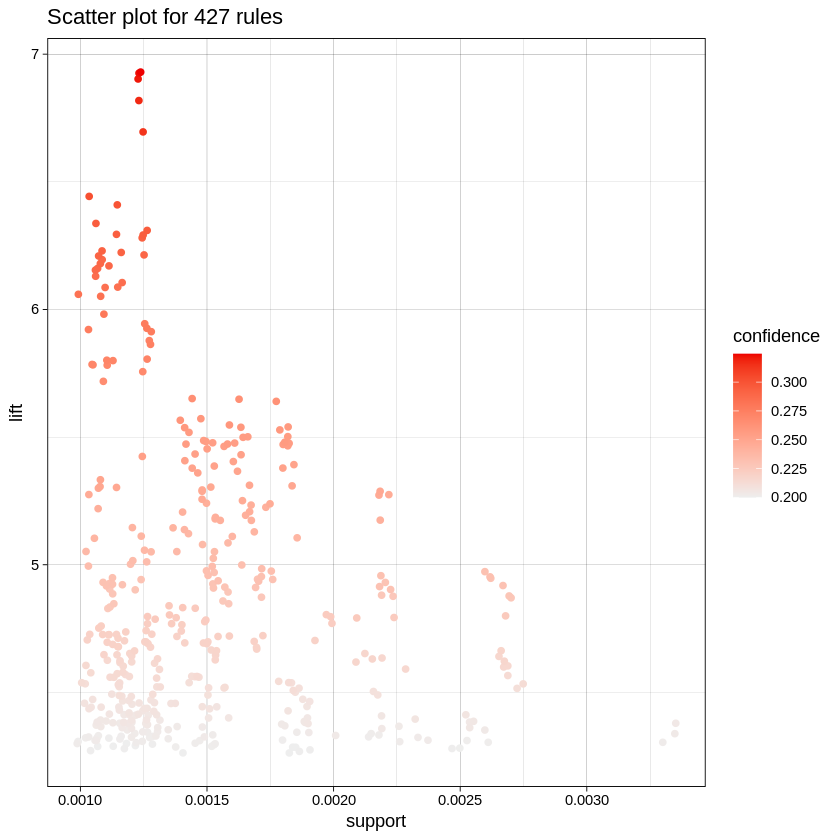

In [ ]:
plot(rules_highpop, method = "scatterplot", measure = c("support", "lift"), shading = "confidence")

In [ ]:
rules_highpop_conf<- subset(rules_highpop, confidence >0.3 & support >= 0.001 & lift > 1.8)
rules_highpop_conf <- sort(rules_highpop_conf, by = "lift", decreasing = TRUE)
inspect(rules_highpop_conf[1:3])

    lhs                             rhs                   support confidence    coverage     lift count
[1] {duration_ms=medium length,                                                                        
     explicit=True,                                                                                    
     danceability=high,                                                                                
     mode=Minor,                                                                                       
     speechiness=musical,                                                                              
     tempo=moderate}             => {popularity=high} 0.001228501  0.3244444 0.003786476 6.944934    73
[2] {duration_ms=medium length,                                                                        
     explicit=True,                                                                                    
     danceability=high,                                         

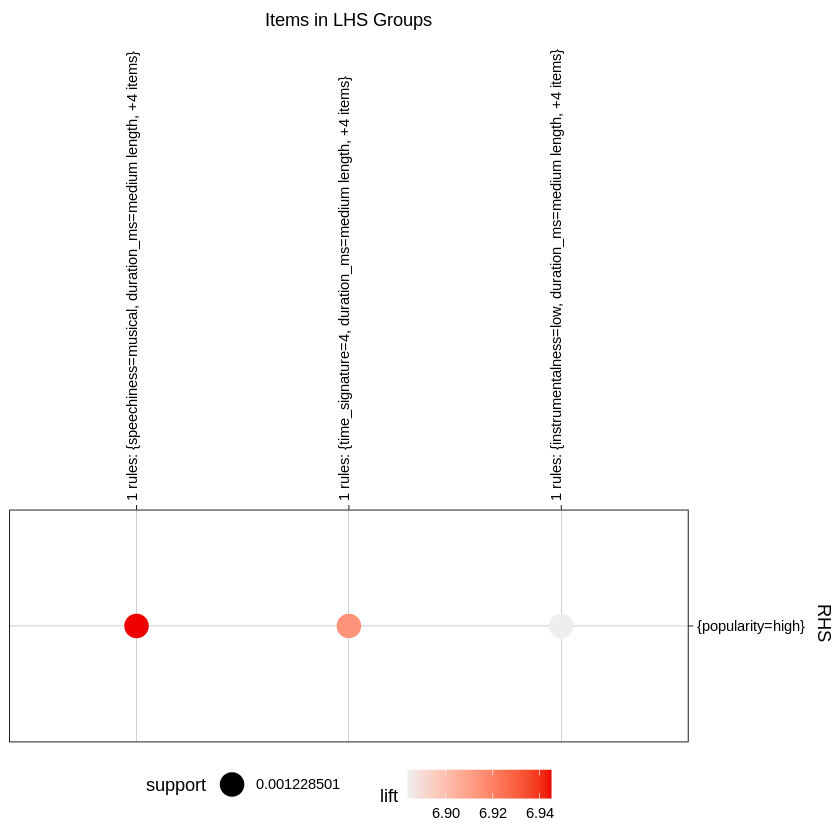

In [ ]:
plot(rules_highpop_conf[1:3], method = "grouped")

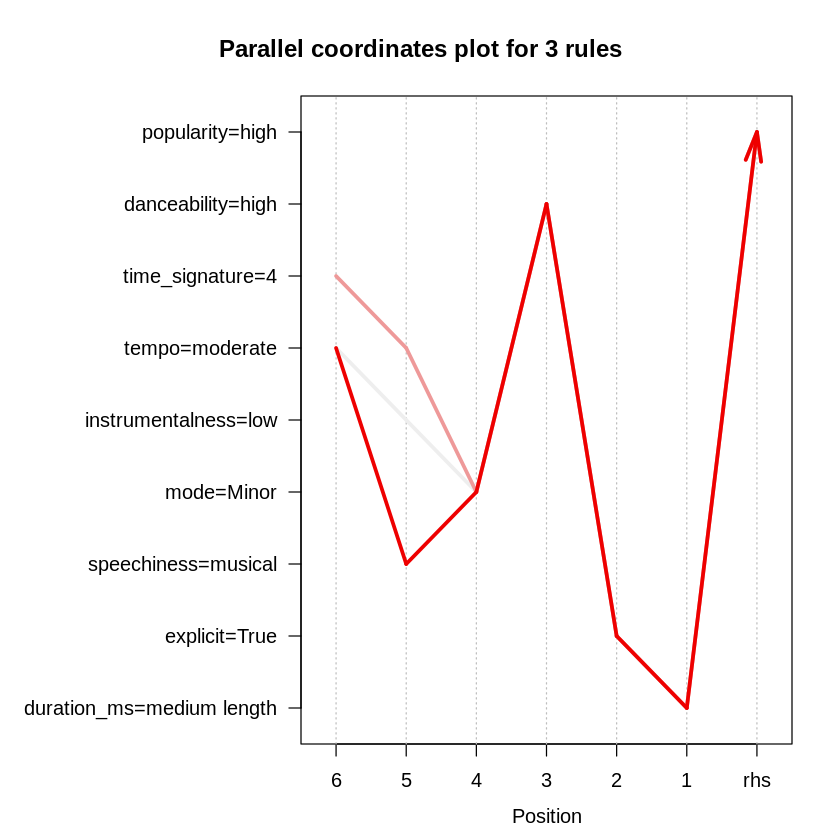

In [ ]:
plot(rules_highpop_conf[1:3], method = "paracoord", control = list(reorder = TRUE))

The first rule identifies that songs with a `medium-length` duration, marked as `explicit`, with `high danceability`, `a minor` key, `musical` (not spoken), and a `moderate tempo` are highly likely to achieve `high popularity`. 73 tracks in the dataset have his combination of attributes - these characteristics are present in a small portion of the dataset. The rule's confidence of 32.44% means that almost a third of songs with these attributes attain `high popularity`. The lift of 6.94 shows that this combination is almost seven times more likely to lead to `high popularity` compared to random chance, showing its strong association.

The second rule adds `time signature = 4`(4/4 is a common rhythm) in place of `musical` (not spoken) of the combination of attributes from the first rule. `Time signature = 4` is present alongside medium-length duration, explicit content, high danceability, minor mode, and moderate tempo.This variation is also seen in 73 tracks, with a slightly lower confidence of 32.30% and a lift of 6.91. This indicates that while the addition of a 4/4 time signature in place of the `musical` atribute does not significantly increase the likelihood of `high popularity`, it reinforces the strength of the rule.

The third rule includes the attribute `low instrumentalness` (in place of `musical`). Low instrumentalness means a lot of vocals are present in a song. `Low instrumentalness` is present alongside medium-length duration, explicit content, high danceability, minor mode, and moderate tempo. Like the previous two rules, this combination describes 73 tracks, has a confidence of 32.16%, and a lift of 6.88. The inclusion of low instrumentalness further emphasizes the importance of vocal or lyrical components in tracks aiming for `high popularity`.


Across all three rules, the shared attributes are: `medium-length` duration, `explicit`, `high danceability`, `minor key`, and `moderate tempo`.Thus, attributes of songs like medium-length, explicit, highly danceable, in a minor key, and moderately paced are key indicators of `high popularity`.

###Rules with `popularity=medium` as the rule consequent

In [ ]:
rules_mediumpop <- apriori(trans, parameter = list(supp = 0.001, conf = 0.3, target = "rules"), appearance = list(default = "lhs", rhs = "popularity=medium"), control = list(verbose = FALSE))


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



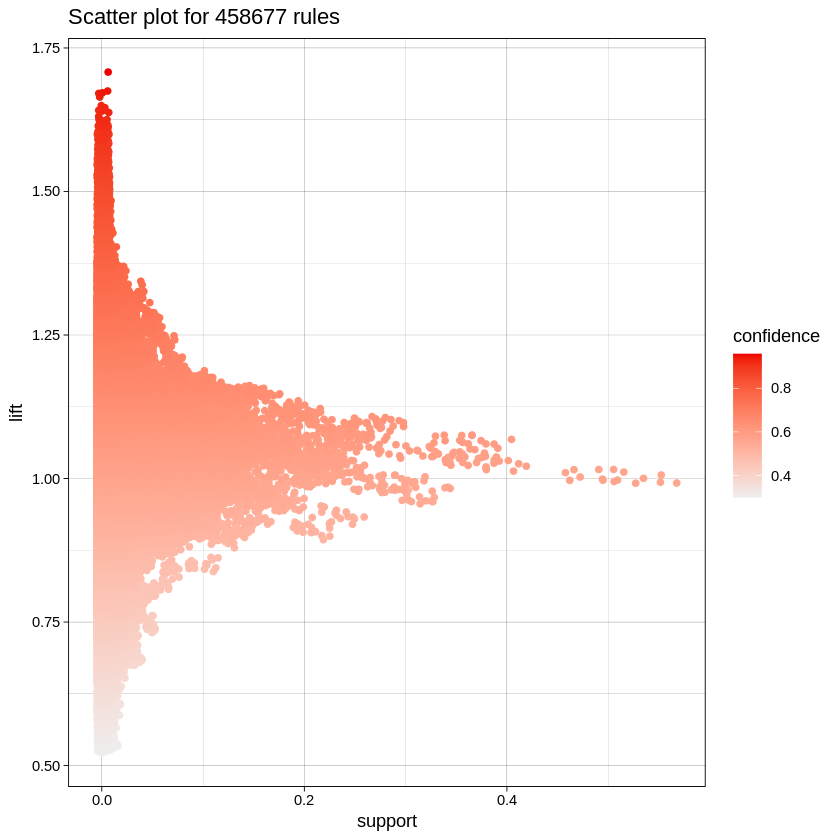

In [ ]:
plot(rules_mediumpop, method = "scatterplot", measure = c("support", "lift"), shading = "confidence")

In [ ]:
rules_mediumpop_conf <- subset(rules_mediumpop, confidence >0.5 & support >= 0.01 & lift > 1)
rules_mediumpop_conf <- sort(rules_mediumpop_conf, by = "lift", decreasing = TRUE)
inspect(rules_mediumpop_conf[1:3])

    lhs                        rhs                    support confidence   coverage     lift count
[1] {danceability=medium,                                                                         
     energy=medium,                                                                               
     acousticness=low,                                                                            
     instrumentalness=low,                                                                        
     valence=sad,                                                                                 
     tempo=fast}            => {popularity=medium} 0.01070311  0.8020177 0.01334523 1.425846   636
[2] {explicit=False,                                                                              
     energy=medium,                                                                               
     acousticness=low,                                                                            
     instr

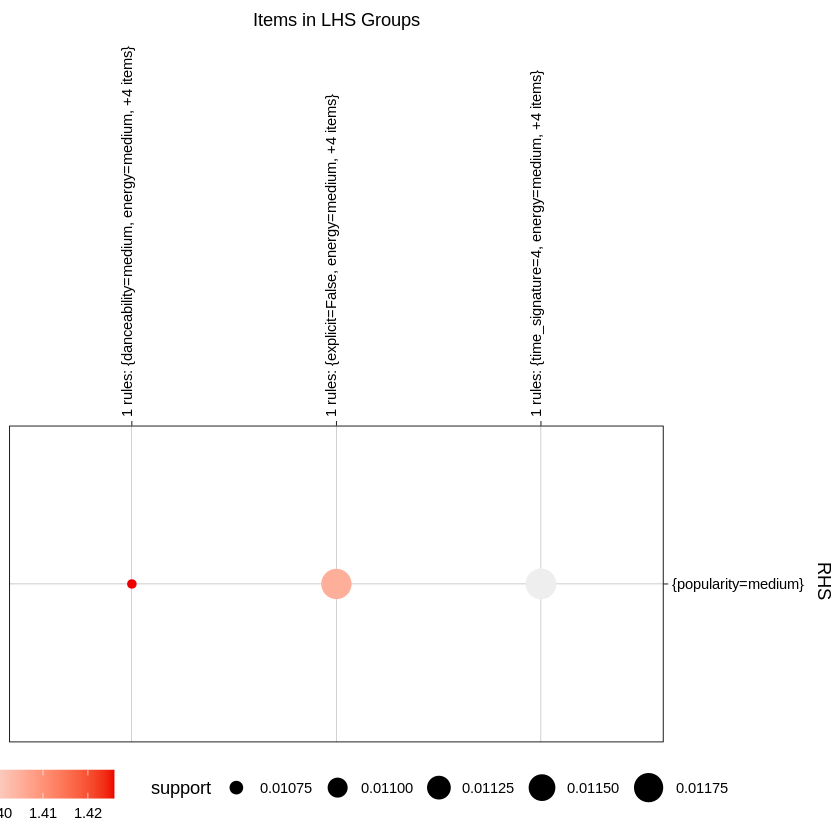

In [ ]:
plot(rules_mediumpop_conf[1:3], method = "grouped")

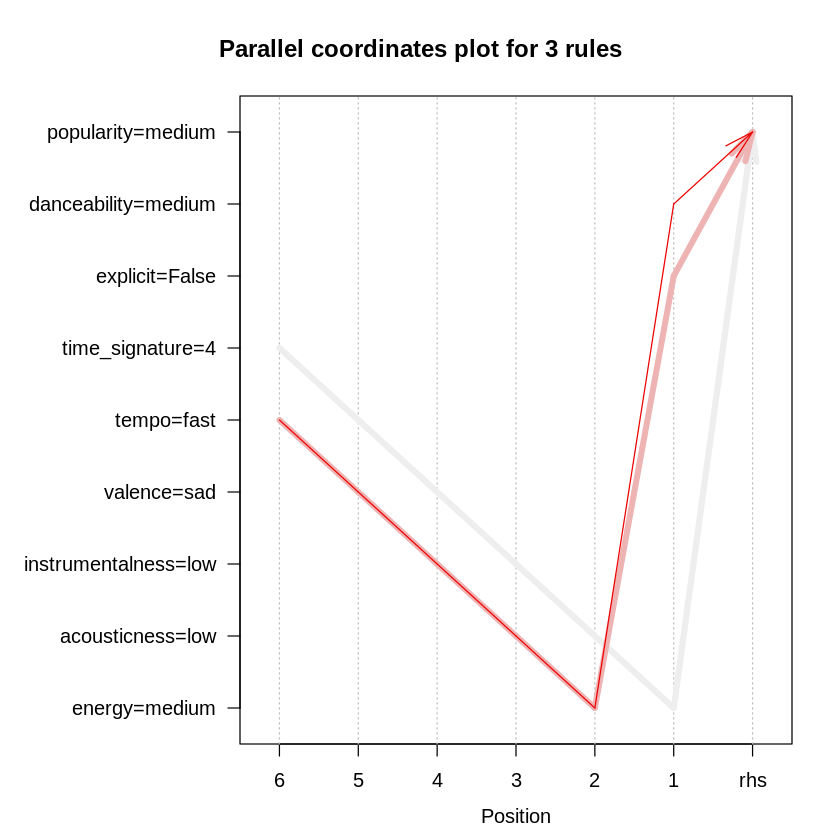

In [ ]:
plot(rules_mediumpop_conf[1:3], method = "paracoord", control = list(reorder = TRUE))

The first rule identifies that songs with `medium danceability`, `medium energy`, `low acousticness`, `low instrumentalness`, `sad valence`, and a `fast tempo` are strongly associated with `medium popularity`. These attributes are present in 636 tracks. The rule's confidence of 80.20% means that a significant majority of songs with these characteristics achieve `medium popularity`. The lift of 1.43 suggests that this combination of attributes is 43% more likely to lead to `medium popularity` compared to random chance, highlighting a moderate association.

The second rule adds `explicit = False` in place of `medium danceability` to the combination of attributes from the first rule. This combination describes 705 tracks. The rule has a confidence of 79.04% and a lift of 1.41.

The third rule replaces `explicit = False` with `time_signature = 4` (a 4/4 rhythm), while maintaining the other attributes: `medium energy`, `low acousticness`, `low instrumentalness`, `sad valence` and `fast tempo`. This rule is associated with 708 tracks and has a confidence of 78.41% and a lift of 1.39.

Across all three rules, the shared attributes are `medium energy`, `low acousticness`, `low instrumentalness`, `sad valence`, and `fast tempo`. Attributes of songs like moderately energetic, not very acoustic, minimally instrumental, melancholic, and fast-paced are key indicators of `medium popularity`.

###Rules with `popularity=low` as the rule consequent

In [ ]:
rules_lowpop <- apriori(trans, parameter = list(supp = 0.0001, conf = 0.1, target = "rules"), appearance = list(default = "lhs", rhs = "popularity=low"), control = list(verbose = FALSE))

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



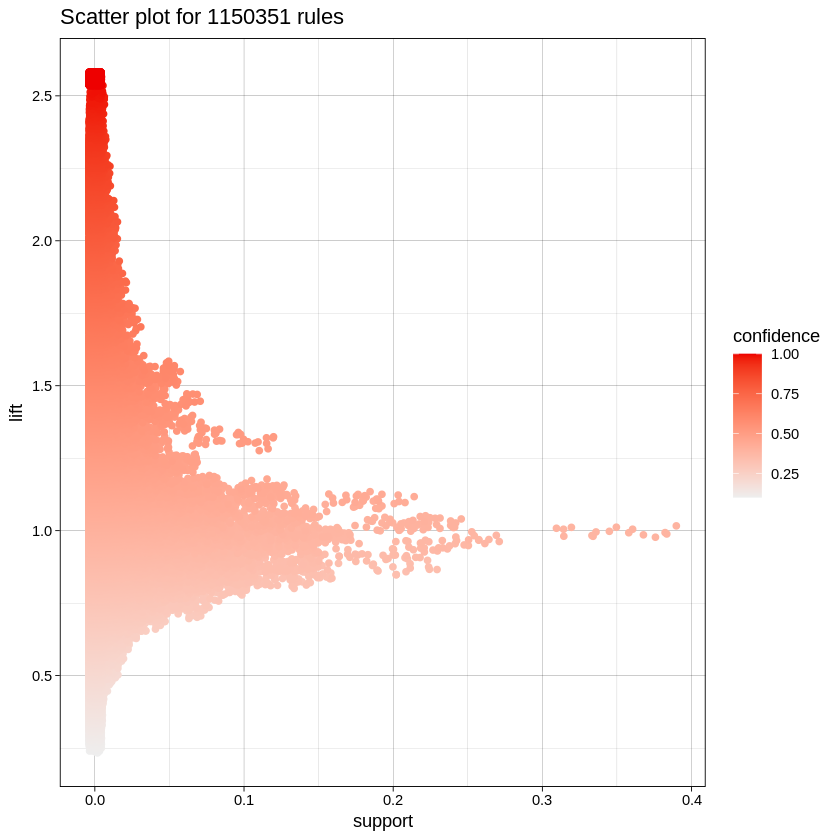

In [ ]:
plot(rules_lowpop, method = "scatterplot", measure = c("support", "lift"), shading = "confidence")

In [ ]:
rules_lowpop_conf <- subset(rules_lowpop, confidence > 0.985 & support >= 0.001 & lift > 2)
rules_lowpop_conf <- sort(rules_lowpop_conf, by = "lift", decreasing = TRUE)
inspect(rules_lowpop_conf[1:3])

    lhs                         rhs                  support confidence    coverage     lift count
[1] {duration_ms=short,                                                                           
     danceability=low,                                                                            
     loudness=loud,                                                                               
     valence=sad,                                                                                 
     tempo=moderate,                                                                              
     time_signature=4}       => {popularity=low} 0.001531419  0.9891304 0.001548248 2.531053    91
[2] {duration_ms=short,                                                                           
     danceability=low,                                                                            
     loudness=loud,                                                                               
     instr

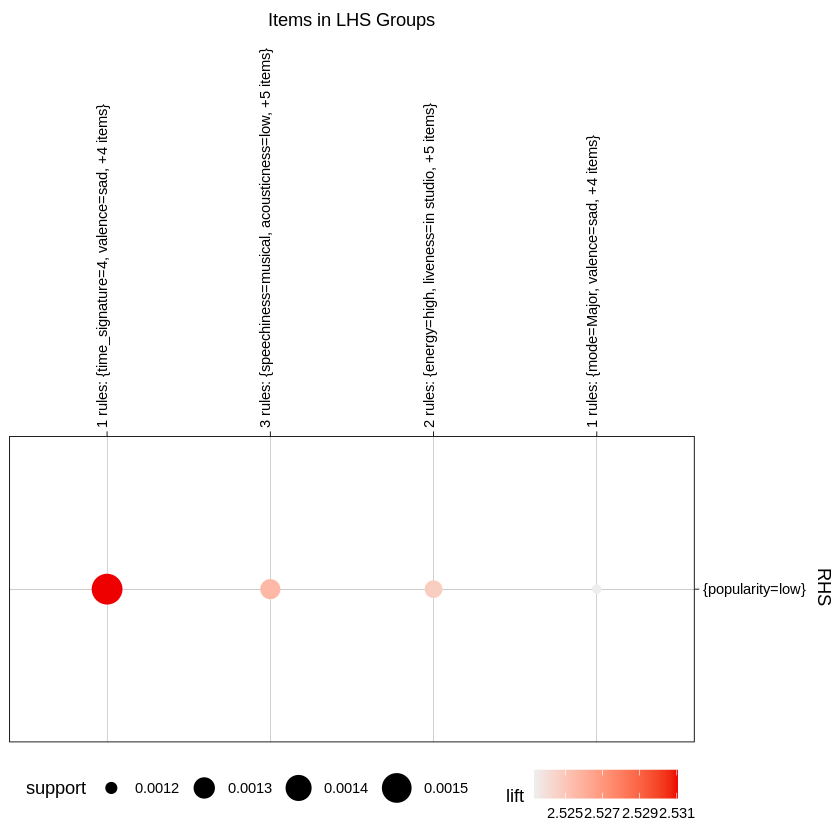

In [ ]:
plot(rules_lowpop_conf, method = "grouped")

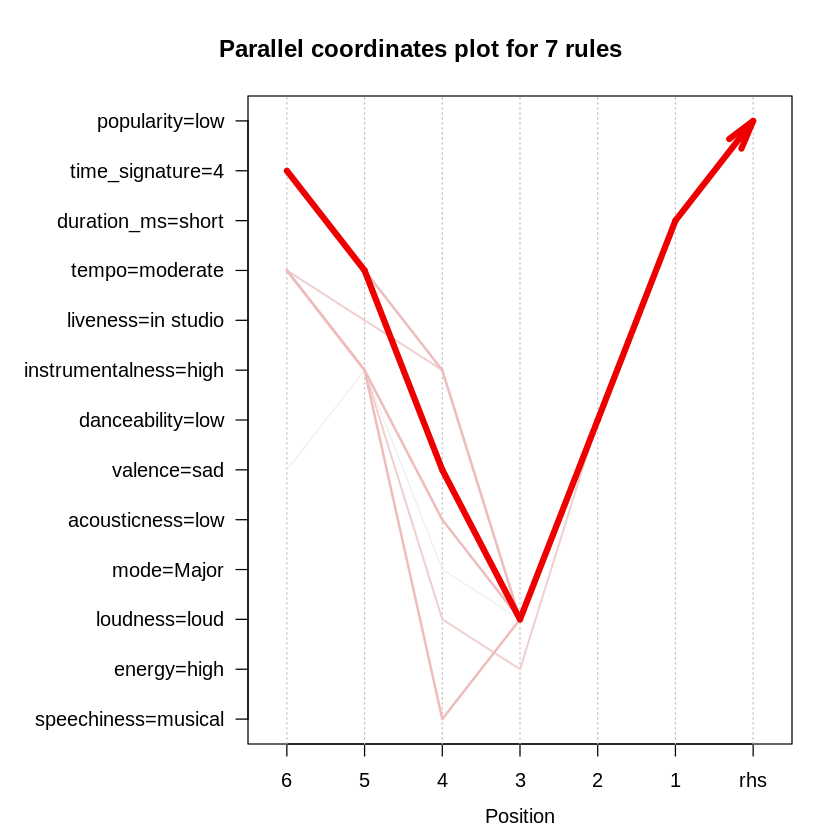

In [ ]:
plot(rules_lowpop_conf, method = "paracoord", control = list(reorder = TRUE))

The first rule identifies that songs with a `short duration`, `low danceability`, `loud` loudness, `sad valence`, `moderate tempo`, and `time signature = 4` are strongly associated with `low popularity`. This combination of attributes is present in 91 tracks, showing that this combination of characteristics is quite rare. The rule’s confidence of 98.91% indicates that nearly all songs with all these features are low in popularity. The lift of 2.53 demonstrates that this combination is 2.53 times more likely to result in `low popularity` compared to random chance, highlighting a strong association.

The second rule replaces `sad valence` and `time signature = 4` with `high instrumentalness`, keeping `short duration`, `low danceability`, the song being`loud` and `moderate tempo`. This combination of aftributes describes 76 tracks and has a confidence of 98.70% which indicates that nearly all songs with all these features are not very poplular. The lift of 2.53 is almost the same as in the first rule.

The third rule further replaces `sad valence` with `low acousticness`, keeping `short duration`, `low danceability`, song being `loud`, `high instrumentalness` and `moderate tempo`. This combination is present in 76 songs and has a confidence of 98.70% and a lift of 2.53. This reinforces the importance of these attributes, particularly the lack of acoustic qualities and a high instrumental focus.


Across all three rules, the shared attributes are `short duration`, `low danceability`, being `loud` and `moderate tempo`. Atributes of songs like short, loud, moderately fast and hard to dance to are key indicators of `low popularity`.



##Final conclusions
This reasearch paper explored how song attributes and genres influence popularity on Spotify using association rule mining. Genres like dance, rock, and house are strong indicators of high popularity, while others such as sleep, chill, and indian are linked to medium popularity, and niche genres like black-metal and grindcore are strongly associated with low popularity. Removing genre as a factor revealed additional patterns: highly popular songs tend to have a medium length, explicit content, high danceability, a minor key, and moderate tempo, while medium-popularity songs are moderately energetic, minimally acoustic, and fast-paced. Conversely, low-popularity songs are characterized by short durations, low danceability, loudness, and moderate tempo. These findings highlight the nuanced role of both musical features and genres in determining a song’s popularity, offering valuable insights for artists, producers, and streaming platforms seeking to optimize audience engagement.